In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-transaction-dataset-for-fraud-detection/bank_transactions_data_2.csv


# Exploratory Data Analysis (EDA)

In [3]:
import pandas as pd

df = pd.read_csv("/kaggle/input/bank-transaction-dataset-for-fraud-detection/bank_transactions_data_2.csv")
df.head().T

,0,1,2,3,4
TransactionID,TX000001,TX000002,TX000003,TX000004,TX000005
AccountID,AC00128,AC00455,AC00019,AC00070,AC00411
TransactionAmount,14.09,376.24,126.29,184.5,13.45
TransactionDate,2023-04-11 16:29:14,2023-06-27 16:44:19,2023-07-10 18:16:08,2023-05-05 16:32:11,2023-10-16 17:51:24
TransactionType,Debit,Debit,Debit,Debit,Credit
Location,San Diego,Houston,Mesa,Raleigh,Atlanta
DeviceID,D000380,D000051,D000235,D000187,D000308
IP Address,162.198.218.92,13.149.61.4,215.97.143.157,200.13.225.150,65.164.3.100
MerchantID,M015,M052,M009,M002,M091
Channel,ATM,ATM,Online,Online,Online


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

Before the initiation of data processing, this dataset contains **16** columns of attributes: <br>
(i) 2 columns of *float64* attributes, <br> (ii) 3 columns of *int64* attributes, and <br> (iii) 11 columns of *object* attributes.

In [5]:
# Before Data Processing
print(f"Before Data Processing")
df.describe(include='all').T

Before Data Processing


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
TransactionID,2512,2512,TX000001,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AccountID,2512,495,AC00362,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TransactionAmount,2512.0,NaN,NaN,NaN,297.593778,291.946243,0.26,81.885,211.14,414.5275,1919.11
TransactionDate,2512,2512,2023-04-11 16:29:14,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TransactionType,2512,2,Debit,1944,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,2512,43,Fort Worth,70,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DeviceID,2512,681,D000697,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IP Address,2512,592,200.136.146.93,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MerchantID,2512,100,M026,45,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Channel,2512,3,Branch,868,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data_column_names = df.columns
print(f"The name of columns in this datasets are:")
print()
print(data_column_names)

The name of columns in this datasets are:

Index(['TransactionID', 'AccountID', 'TransactionAmount', 'TransactionDate',
       'TransactionType', 'Location', 'DeviceID', 'IP Address', 'MerchantID',
       'Channel', 'CustomerAge', 'CustomerOccupation', 'TransactionDuration',
       'LoginAttempts', 'AccountBalance', 'PreviousTransactionDate'],
      dtype='object')


In [7]:
for col in data_column_names:
    print(f"Number of Unique values in the `{col}` attribute:" , df[col].nunique())
    print(f"Distinct unique values in the `{col}` attribute:" , df[col].unique())
    print("-" * 70)

Number of Unique values in the `TransactionID` attribute: 2512
Distinct unique values in the `TransactionID` attribute: ['TX000001' 'TX000002' 'TX000003' ... 'TX002510' 'TX002511' 'TX002512']
----------------------------------------------------------------------
Number of Unique values in the `AccountID` attribute: 495
Distinct unique values in the `AccountID` attribute: ['AC00128' 'AC00455' 'AC00019' 'AC00070' 'AC00411' 'AC00393' 'AC00199'
 'AC00069' 'AC00135' 'AC00385' 'AC00150' 'AC00459' 'AC00392' 'AC00264'
 'AC00085' 'AC00270' 'AC00317' 'AC00359' 'AC00242' 'AC00285' 'AC00002'
 'AC00014' 'AC00095' 'AC00453' 'AC00241' 'AC00041' 'AC00441' 'AC00057'
 'AC00390' 'AC00313' 'AC00367' 'AC00291' 'AC00060' 'AC00365' 'AC00267'
 'AC00404' 'AC00202' 'AC00478' 'AC00405' 'AC00421' 'AC00480' 'AC00120'
 'AC00117' 'AC00011' 'AC00401' 'AC00282' 'AC00439' 'AC00296' 'AC00471'
 'AC00159' 'AC00482' 'AC00115' 'AC00055' 'AC00419' 'AC00374' 'AC00271'
 'AC00456' 'AC00143' 'AC00427' 'AC00438' 'AC00425' 'AC0032

There isn't any null columns or attributes discovered thus far.

In [8]:
df.isnull().sum()

TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64

In [9]:
# Missing values
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Values': missing,
    'Percentage': missing_percent
})
missing_df

,Missing Values,Percentage
TransactionID,0,0.0
AccountID,0,0.0
TransactionAmount,0,0.0
TransactionDate,0,0.0
TransactionType,0,0.0
Location,0,0.0
DeviceID,0,0.0
IP Address,0,0.0
MerchantID,0,0.0
Channel,0,0.0


In [10]:
# Duplicate rows
df.duplicated().sum()

0

# Data Processing

## 1. Conversion of Data Types

Update **TransactionDate** into *datetime*

In [11]:
# Before Transformation 
print(f"Data Type before transformation:", df['TransactionDate'].dtypes)

# After Transformation
from datetime import datetime

df['TransactionDate'] = pd.to_datetime(df['TransactionDate'], format='ISO8601')
print(f"Data Type after transformation:", df['TransactionDate'].dtypes)

Data Type before transformation: object
Data Type after transformation: datetime64[ns]


Update **PreviousTransactionDate** into *datetime*

In [12]:
# Before Transformation 
print(f"Data Type before transformation:", df['PreviousTransactionDate'].dtypes)

# After Transformation
df['PreviousTransactionDate'] = pd.to_datetime(df['PreviousTransactionDate'], format='ISO8601')
print(f"Data Type after transformation:", df['PreviousTransactionDate'].dtypes)

Data Type before transformation: object
Data Type after transformation: datetime64[ns]


In [13]:
# Before Transformation 
print(f"Data Type before transformation:", df['TransactionAmount'].dtypes)

# After Transformation
## -- no change required

Data Type before transformation: float64


In [14]:
# Before Transformation
print(f"Data Type before transformation:", df['CustomerAge'].dtypes)

# After Transformation
## -- no change required

Data Type before transformation: int64


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   TransactionID            2512 non-null   object        
 1   AccountID                2512 non-null   object        
 2   TransactionAmount        2512 non-null   float64       
 3   TransactionDate          2512 non-null   datetime64[ns]
 4   TransactionType          2512 non-null   object        
 5   Location                 2512 non-null   object        
 6   DeviceID                 2512 non-null   object        
 7   IP Address               2512 non-null   object        
 8   MerchantID               2512 non-null   object        
 9   Channel                  2512 non-null   object        
 10  CustomerAge              2512 non-null   int64         
 11  CustomerOccupation       2512 non-null   object        
 12  TransactionDuration      2512 non-

In [16]:
# After Data Processing
print(f"After Data Processing")
df.describe(include='all').T

After Data Processing


,count,unique,top,freq,mean,min,25%,50%,75%,max,std
TransactionID,2512,2512,TX000001,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AccountID,2512,495,AC00362,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TransactionAmount,2512.0,NaN,NaN,NaN,297.593778,0.26,81.885,211.14,414.5275,1919.11,291.946243
TransactionDate,2512,NaN,NaN,NaN,2023-07-05 20:32:10.826433024,2023-01-02 16:00:06,2023-04-03 16:22:05.750000128,2023-07-07 17:49:43.500000,2023-10-06 18:40:53.500000,2024-01-01 18:21:50,NaN
TransactionType,2512,2,Debit,1944,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,2512,43,Fort Worth,70,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DeviceID,2512,681,D000697,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IP Address,2512,592,200.136.146.93,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MerchantID,2512,100,M026,45,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Channel,2512,3,Branch,868,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# Export DataFrame to CSV
df.to_csv('output.csv', index=True)

## 2. Data Columns Separation 
Sample Reference: https://www.kaggle.com/code/mishashikhov/bank-fraud-detection-and-transaction-analysis 
* numeric
* categorical

In [18]:
# Column type separation
id_cols = ['TransactionID', 'AccountID']
date_cols = ['TransactionDate', 'PreviousTransactionDate']

# Convert to datetime
for col in date_cols:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')

# Identify numeric vs categorical
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print("Numeric columns:", numeric_cols)
print("Categorical columns:", categorical_cols)

Numeric columns: ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']
Categorical columns: ['TransactionID', 'AccountID', 'TransactionType', 'Location', 'DeviceID', 'IP Address', 'MerchantID', 'Channel', 'CustomerOccupation']


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


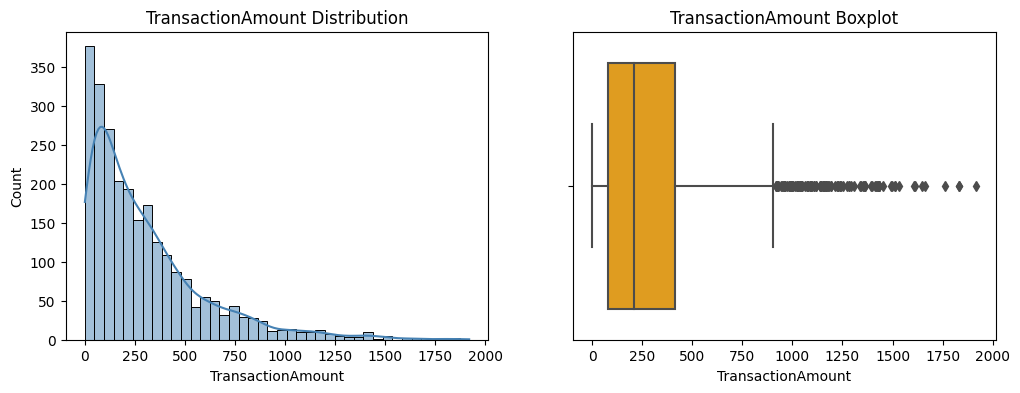

count    2512.000000
mean      297.593778
std       291.946243
min         0.260000
25%        81.885000
50%       211.140000
75%       414.527500
max      1919.110000
Name: TransactionAmount, dtype: float64
Skewness: 1.74, Kurtosis: 3.64



/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


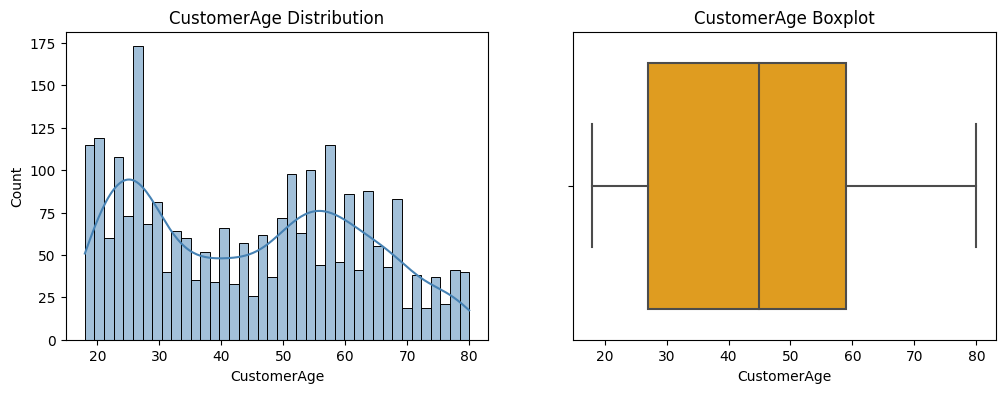

count    2512.000000
mean       44.673965
std        17.792198
min        18.000000
25%        27.000000
50%        45.000000
75%        59.000000
max        80.000000
Name: CustomerAge, dtype: float64
Skewness: 0.15, Kurtosis: -1.22



/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


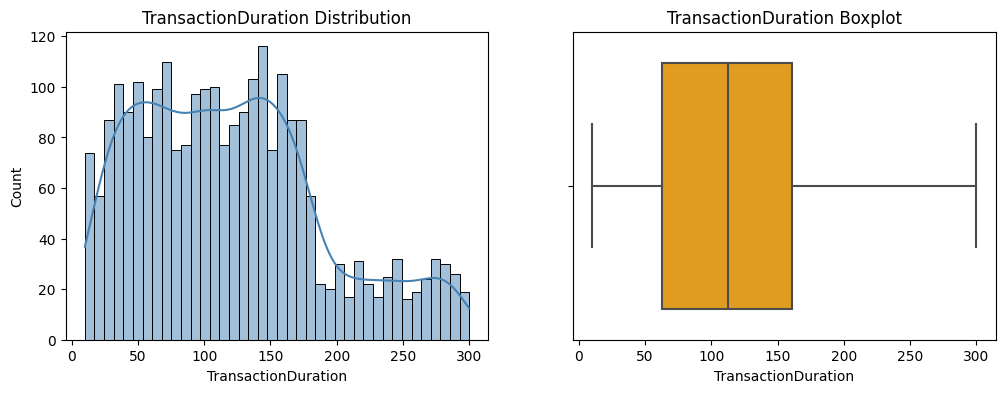

count    2512.000000
mean      119.643312
std        69.963757
min        10.000000
25%        63.000000
50%       112.500000
75%       161.000000
max       300.000000
Name: TransactionDuration, dtype: float64
Skewness: 0.60, Kurtosis: -0.26



/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


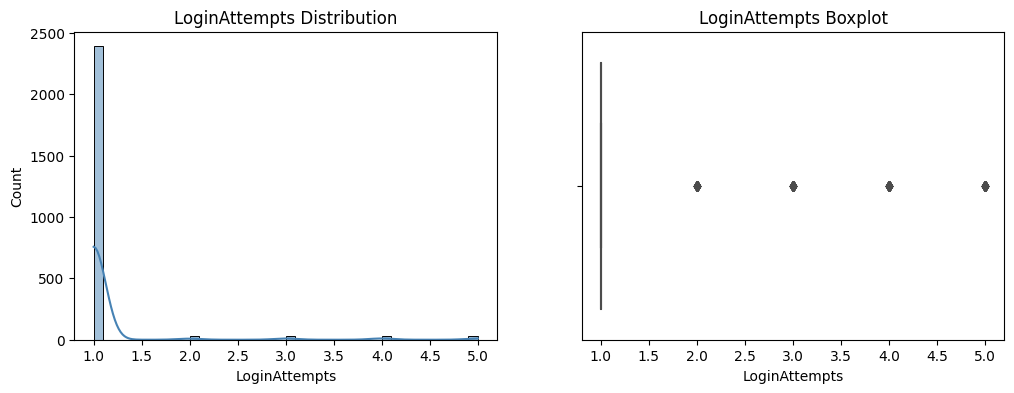

count    2512.000000
mean        1.124602
std         0.602662
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         5.000000
Name: LoginAttempts, dtype: float64
Skewness: 5.17, Kurtosis: 26.67



/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


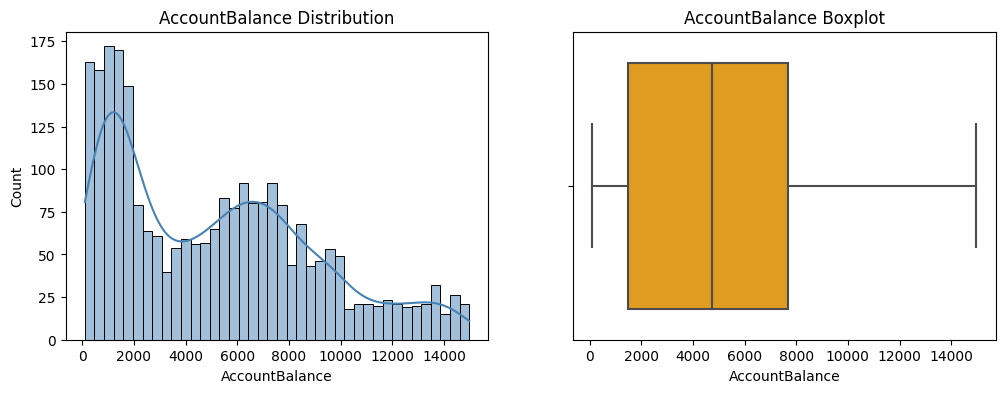

count     2512.000000
mean      5114.302966
std       3900.942499
min        101.250000
25%       1504.370000
50%       4735.510000
75%       7678.820000
max      14977.990000
Name: AccountBalance, dtype: float64
Skewness: 0.60, Kurtosis: -0.56



In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in numeric_cols:
    fig, axes = plt.subplots(1, 2, figsize=(12,4))
    sns.histplot(df[col], kde=True, bins=40, ax=axes[0], color="steelblue")
    axes[0].set_title(f"{col} Distribution")
    sns.boxplot(x=df[col], ax=axes[1], color="orange")
    axes[1].set_title(f"{col} Boxplot")
    plt.show()
    print(df[col].describe().T)
    print(f"Skewness: {df[col].skew():.2f}, Kurtosis: {df[col].kurt():.2f}\n")

# Univariate Analysis

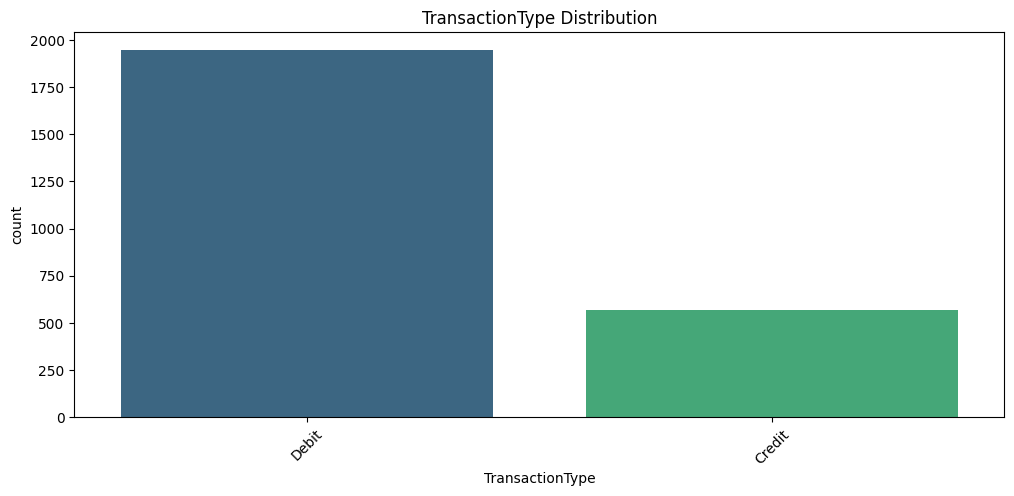

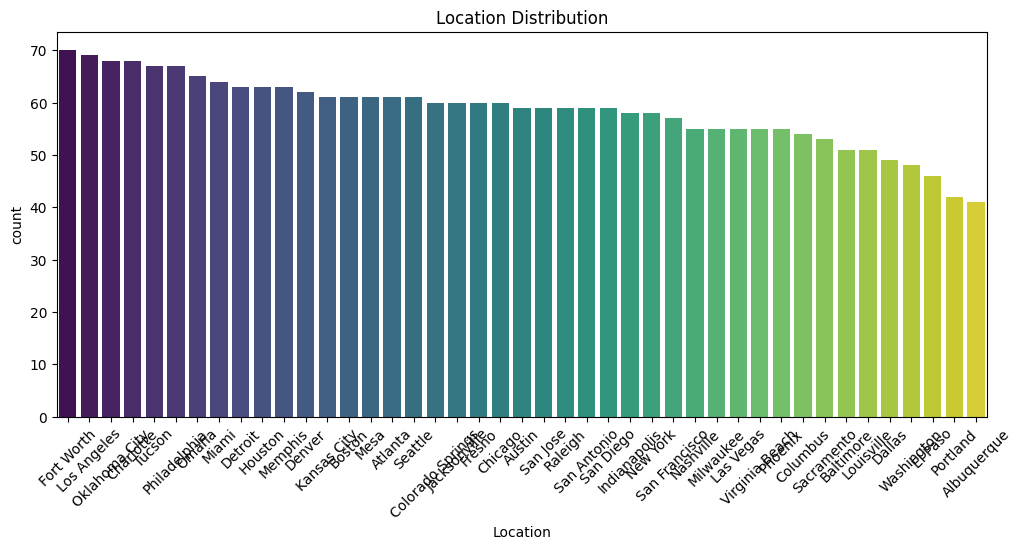

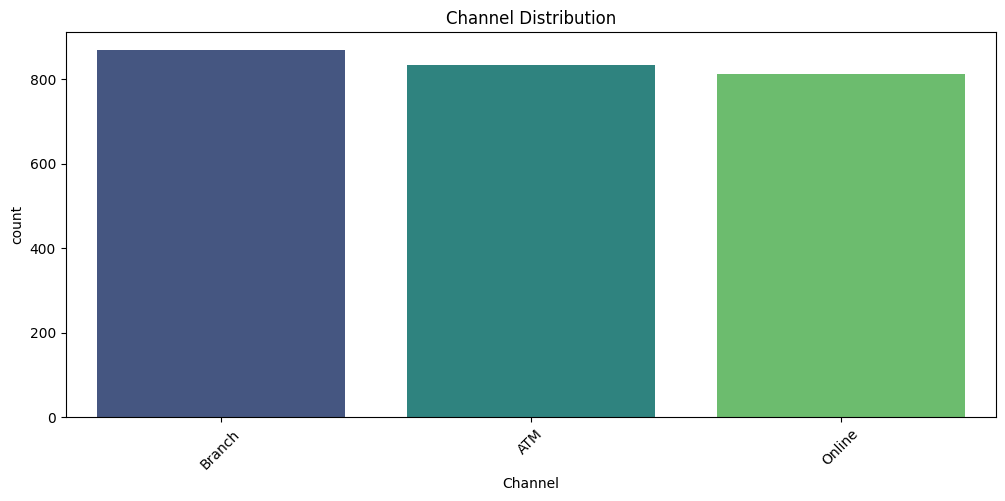

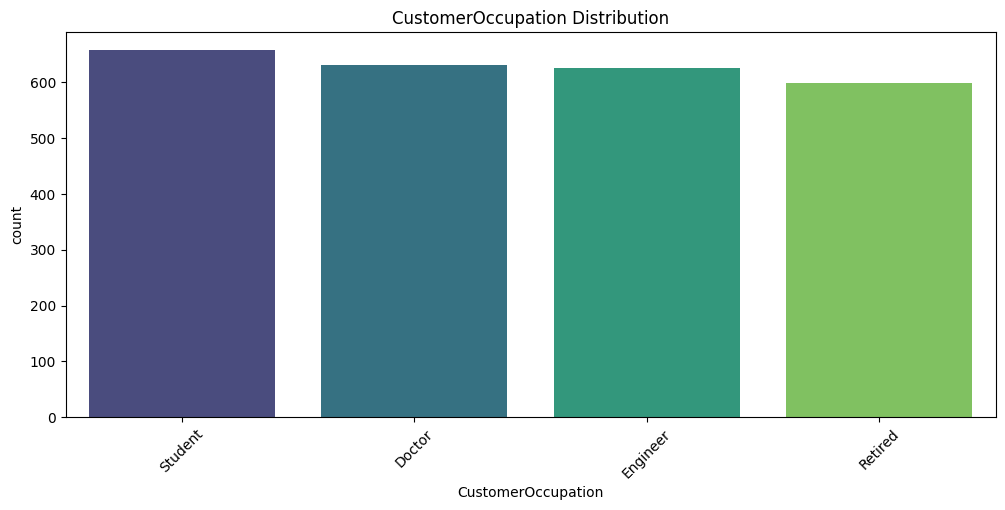

In [20]:
cat_cols = [
    'TransactionType', 
    'Location', 
    'Channel', 
    'CustomerOccupation'
]

for col in cat_cols:
    plt.figure(figsize=(12,5))
    order = df[col].value_counts().index
    sns.countplot(x=col, data=df, order=order, palette="viridis")
    plt.title(f"{col} Distribution")
    plt.xticks(rotation=45)
    plt.show()

# Bivariate Analysis
Sample Reference: https://www.geeksforgeeks.org/maths/bivariate-analysis/
* Categorical vs Numerical 

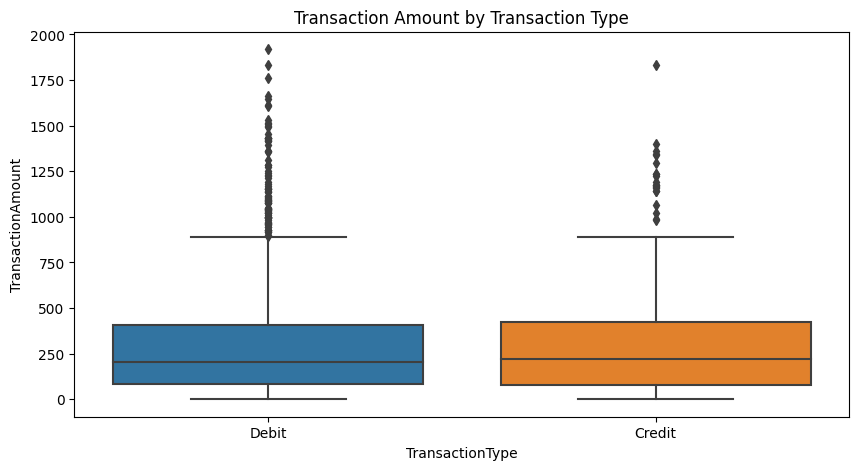

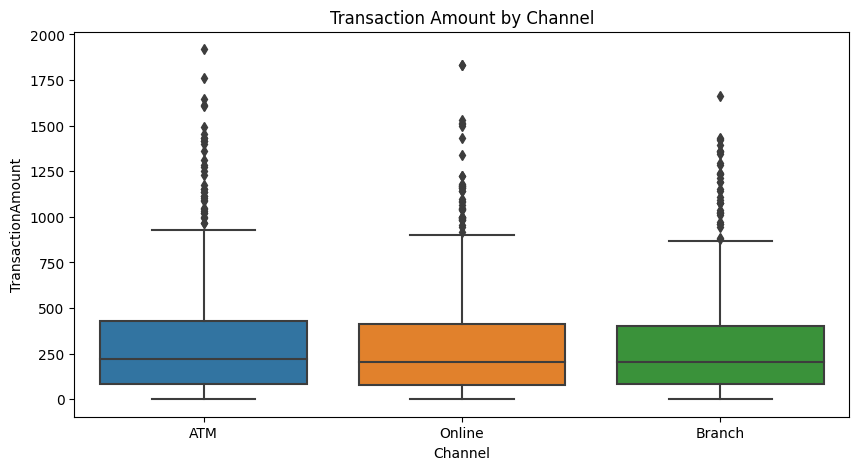

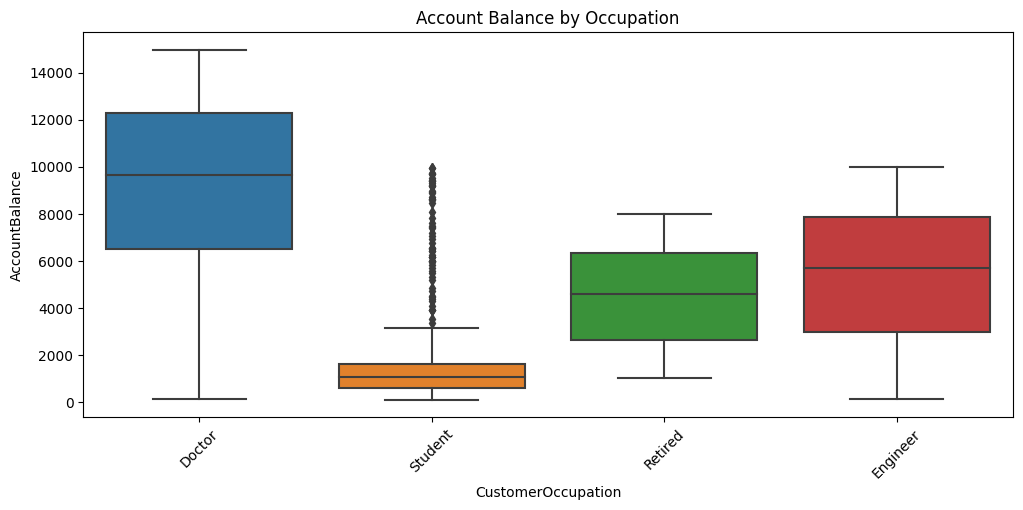

In [21]:
plt.figure(figsize=(10,5))
sns.boxplot(x='TransactionType', y='TransactionAmount', data=df)
plt.title("Transaction Amount by Transaction Type")
plt.show()

plt.figure(figsize=(10,5))
sns.boxplot(x='Channel', y='TransactionAmount', data=df)
plt.title("Transaction Amount by Channel")
plt.show()

plt.figure(figsize=(12,5))
sns.boxplot(x='CustomerOccupation', y='AccountBalance', data=df)
plt.title("Account Balance by Occupation")
plt.xticks(rotation=45)
plt.show()

* numeric vs numeric

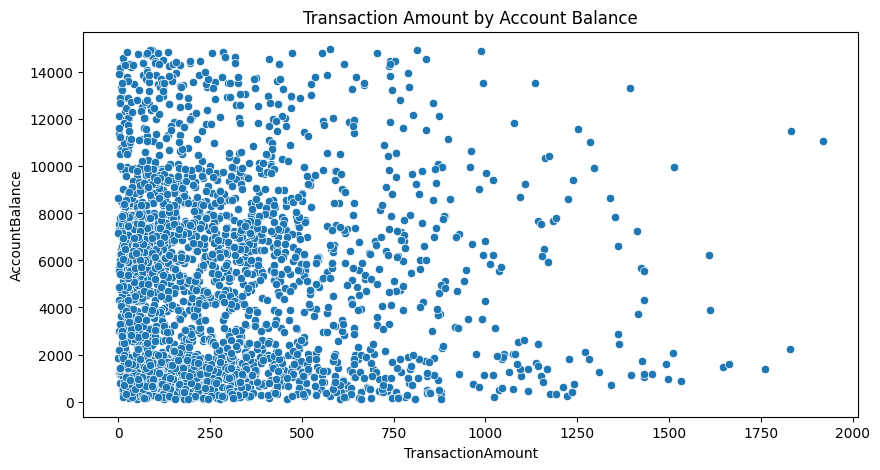

In [22]:
plt.figure(figsize=(10,5))
sns.scatterplot(x="TransactionAmount", y="AccountBalance", data=df)
plt.title("Transaction Amount by Account Balance")
plt.show()

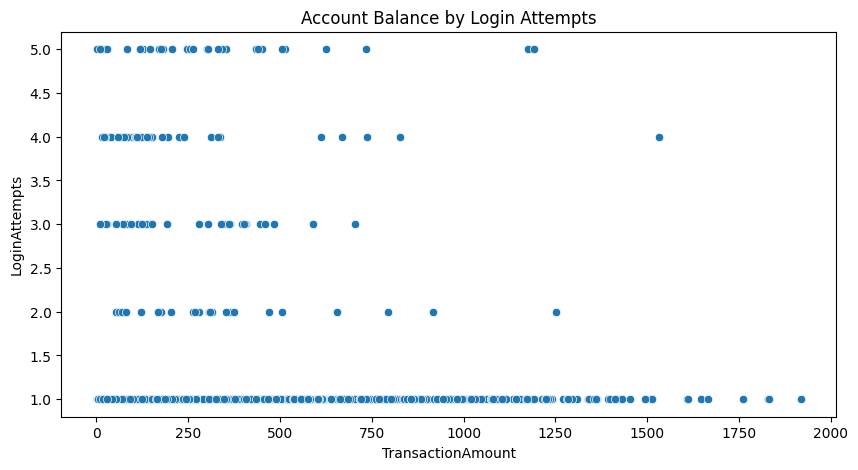

In [24]:
plt.figure(figsize=(10,5))
sns.scatterplot(x="TransactionAmount", y="LoginAttempts", data=df)
plt.title("Account Balance by Login Attempts")
plt.show()

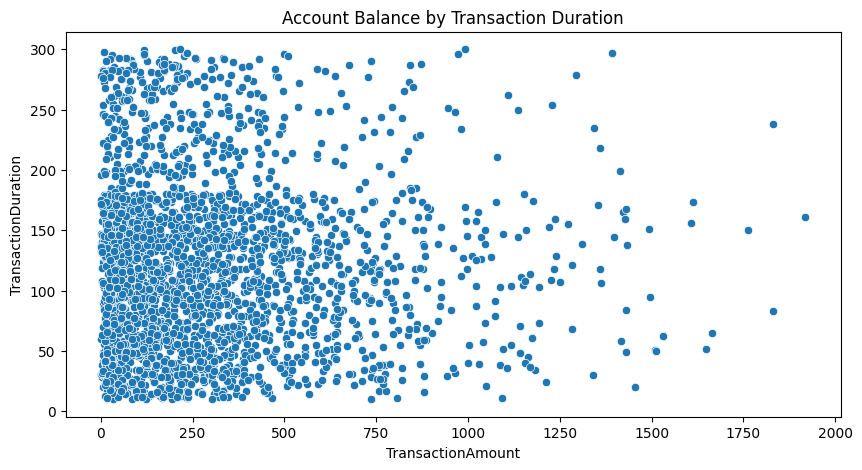

In [25]:
plt.figure(figsize=(10,5))
sns.scatterplot(x="TransactionAmount", y="TransactionDuration", data=df)
plt.title("Account Balance by Transaction Duration")
plt.show()

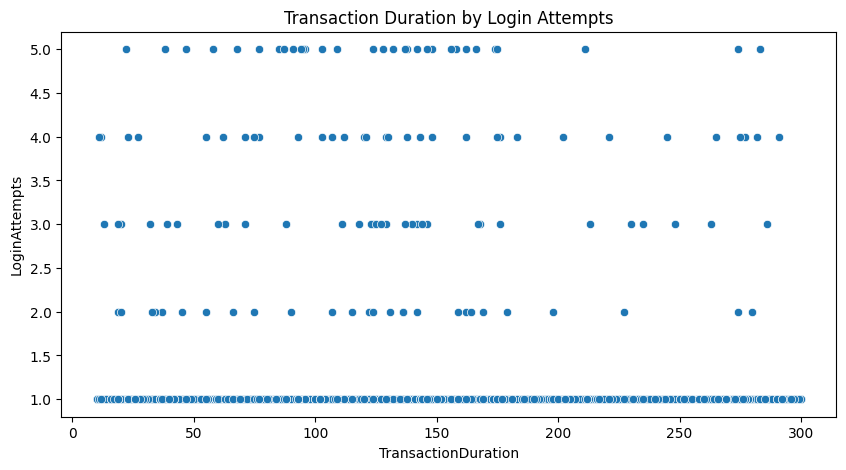

In [28]:
plt.figure(figsize=(10,5))
sns.scatterplot(x="TransactionDuration", y="LoginAttempts", data=df)
plt.title("Transaction Duration by Login Attempts")
plt.show()

# Archive 
For personal or learnt-lesson reference only
* numpy requires further study
* pandasql seems to have limitation, should try to use sqlachemy instead.
* time series analysis is something that yet to be learned and comprehended as at Nov 2025.

In [27]:
duplicate = df.duplicated().sum()
duplicate_percent = (duplicate / len(df)) * 100
duplicate_df = pd.DataFrame({
    'Duplicate Values': duplicate,
    'Percentage': duplicate_percent
})

ValueError: If using all scalar values, you must pass an index

## 2. More about 1st Quartile of Transaction Amount

In [8]:
from pandasql import sqldf
import pandas as pd

q1 = """
        SELECT TransactionDate, AVG(TransactionAmount) AS AVG_Trans_Amt
        from df
        GROUP BY TransactionDate
        HAVING TransactionAmount < 81.885;
    """
# q2 = """SELECT * from df WHERE TransactionAmount BETWEEN 81.885 AND 211.14;"""
# q3 = """SELECT * from df WHERE TransactionAmount BETWEEN 211.14 AND 414.5275;"""
# q4 = """SELECT * from df WHERE TransactionAmount > 414.5275;"""

q1 = sqldf(q1, env=None)
q1.tail()

,TransactionDate,AVG_Trans_Amt
623,2024-01-01 16:07:05,2.03
624,2024-01-01 16:08:49,40.66
625,2024-01-01 16:25:13,29.92
626,2024-01-01 16:34:10,56.98
627,2024-01-01 16:45:56,0.84


In [9]:
# https://www.geeksforgeeks.org/python/time-series-plot-or-line-plot-with-pandas/

y = q1['TransactionDate']
x = q1['AVG_Trans_Amt']

# Create a dataframe using the two lists
Q1 = pd.DataFrame(
    { 'TransactionDate' : y , 'AVG_Trans_Amt' : x })

Q1

,TransactionDate,AVG_Trans_Amt
0,2023-01-02 16:00:06,68.10
1,2023-01-02 16:27:18,73.88
2,2023-01-02 16:45:05,20.17
3,2023-01-02 17:34:13,11.19
4,2023-01-03 18:18:14,61.98
...,...,...
623,2024-01-01 16:07:05,2.03
624,2024-01-01 16:08:49,40.66
625,2024-01-01 16:25:13,29.92
626,2024-01-01 16:34:10,56.98


NameError: name 'plt' is not defined

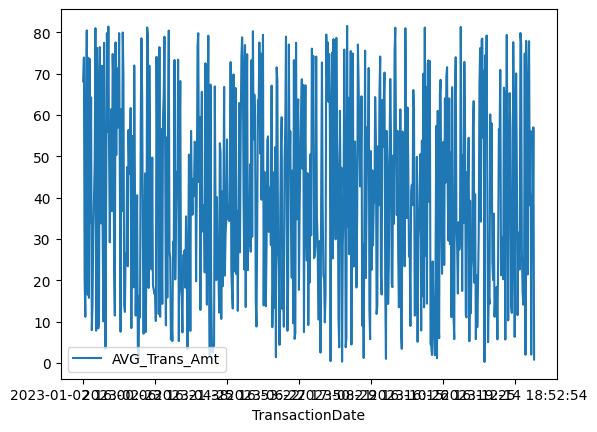

In [10]:
# use plot() method on the dataframe

Q1.plot( 'TransactionDate' , 'AVG_Trans_Amt' )

plt.title("Average Transaction Amount")  # Chart title
plt.show()

In [ ]:
import plotly.express as px

a = px.line(Q1, x="TransactionDate", y="AVG_Trans_Amt", title='Average Transaction Amount')
a.show()

In [ ]:
sqldf(q2, env=None)

In [ ]:
print(sqldf('''SELECT * from df 
            WHERE TransactionAmount 
            BETWEEN 81.885 AND 211.14
            ORDER BY TransactionAmount;
         '''))

In [ ]:
sqldf(q2, env=None).info()

In [ ]:
print(sqldf('''SELECT * from df 
                WHERE TransactionAmount 
                BETWEEN 81.885 AND 211.14;
                '''))

In [ ]:
df.info()

In [ ]:
print(sqldf('''SELECT species, island 
FROM penguins 
LIMIT 5'''))